## Overview Exercises

*For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.*

## Has the network latency gone up since we switched internet service providers?

**H0:** Network latency has remained the same since we switched internet service providers.

**Ha:** Network latency has gone up since we switched internet service providers. 

True Positive: We conclude that latency has gone up since switching providers and that is actually the case.

True Negative: We conclude that latency has remained the same since the switch and that is actually the case. 

Type I Error: We reject the our null hypothesis that latency has remaine the same when latency has indeed remained the same. 

Type II Error: We don't reject our null hypothesis and conclude that there is no latency difference when latency really did go up or there was a change. 


## Is the website redesign any good?

**H0:** The new website design doesn't attract any more traffic than the old one.

**Ha:** The new website design increases traffic. 

True Positive: We conclude that there is an increase in traffic and that is actually the case.

True Negative: We conclude that website traffic has remained the same and that is actually the case. 

Type I Error: We reject our null hypothesis that the redesign doesn't attract more traffic than the old one when in fact there is no change in website traffic. 

Type II Error: We don't reject our null hypothesis, and conclude that there is no traffic change when in fact there was a change. 

## Is our television ad driving more sales?

**H0:** The television add didn't increase sales. 

**Ha:** The television add caused an increase in sales. 

True Positive: We conclude that the ad caused an increase in sales and that is actually the case. 

True Negative: We conclude that the television ad did not increase sales and that is actually the case.

Type I Error: We reject our null hypothesis that the ad is didn't increase sales when it did not increase sales.

Type II Error: We don't reject the null hypothesis when the ad did causse a change in sales. 

## T-Test Exercises

- *Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.*



In [1]:
import math
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns

**My Hypotheses**

- $H0$: There is no difference in average time to sell between the two offices.

- $Ha$: There is a difference in average time to sell between the two offices. 

<AxesSubplot:>

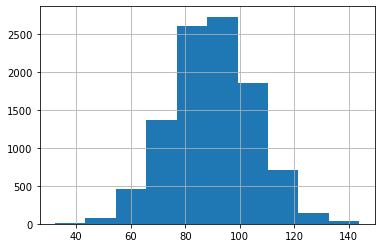

In [2]:
#Office 1 Normal Distribution
office_1 = pd.Series(stats.norm(90, 15).rvs(10_000))
office_1.hist()

<AxesSubplot:>

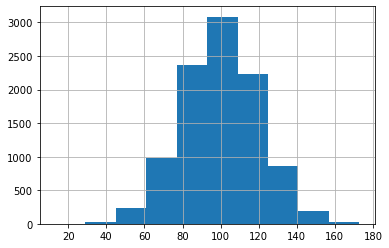

In [3]:
#Office 2 Normal Distribution
office_2 = pd.Series(stats.norm(100, 20).rvs(10_000))
office_2.hist()

In [4]:
#Both Distributions
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

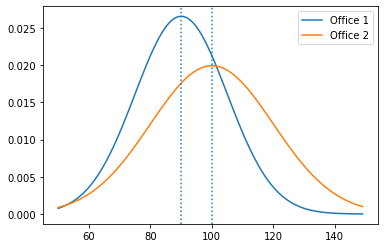

In [5]:
plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')

plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':')

plt.legend()
plt.show()

In [6]:
#T-Test using Scipy
a= .05

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p


(-2.7091418459143854, 0.00811206270346016)

In [7]:
# Becuase it is a 2-tailed test
if p < a: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We reject H0.


- **Load the mpg dataset and use it to answer the following questions:**

*Is there a difference in fuel-efficiency in cars from 2008 vs 1999?*

**My Hypotheses**

- $H0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999. 

- $Ha$: There is a difference in fuel-efficiency in cars from 2008 vs 1999. 

In [8]:
# Load the data set
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
# Create column with combined average gas mileage
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [10]:
# Create my subgroups
mpg_2008 = mpg[mpg.year == 2008].avg_mpg

mpg_1999 = mpg[mpg.year == 1999].avg_mpg

117

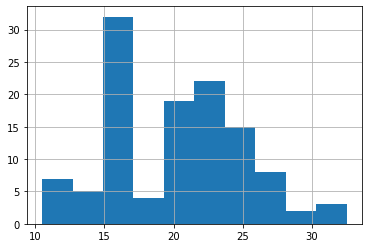

In [11]:
# mpg_2008 distribution -- approximately normal
mpg_2008.hist()
mpg_2008.count()

117

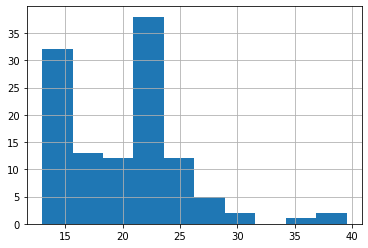

In [12]:
#mpg_1999 distribution - aprroximately normal
mpg_1999.hist()
mpg_1999.count()

In [13]:
# Compate the variance of both samples
mpg_2008.var(), mpg_1999.var()
# Roughly the same

(24.097480106100797, 27.122605363984682)

In [14]:
stats.levene(mpg_2008, mpg_1999)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [15]:
# calculate t-statistic and p value 
alpha = .05
t, p = stats.ttest_ind(mpg_2008, mpg_1999)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [16]:
# Because it is a 2-tailed test
if p < alpha: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We fail to reject H0.


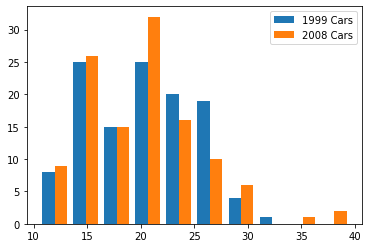

In [17]:
# Visualized 
plt.hist([mpg_2008, mpg_1999], label =['1999 Cars', '2008 Cars'])
plt.legend()

- *Are compact cars more fuel-efficient than the average car?*


**My Hypotheses:**

- $H0$: There is no difference in fuel efficiency between compact cars and the average car. 

- $Ha$: Compact cars ae more fuel efficient than the average car. 

In [18]:
# Create subgroup representing compact car fuel efficiency 
compact_mpg = mpg[mpg['class'] == 'compact'].avg_mpg
compact_mpg.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [19]:
# Create variable representing average fuel efficiency of all cars in the population.

population_avg = mpg.avg_mpg.mean()
population_avg

20.14957264957265

47

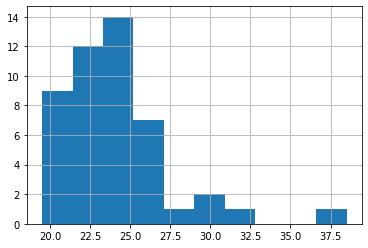

In [20]:
# Approximately Normal Distribution for our subgroup
compact_mpg.hist()
compact_mpg.count()

In [21]:
# Conduct our t-test
t, p = stats.ttest_1samp(compact_mpg, population_avg)
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [22]:
# Because it is a 1 sample test
if p/2 < alpha: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We reject H0.


- Do manual cars get better gas mileage than automatic cars?

H0: There is no difference in gas mileage between manual and automatic cars.

Ha: Manual cars get better gas mileage than automatic cars. 

In [23]:
mpg_auto= mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg

157

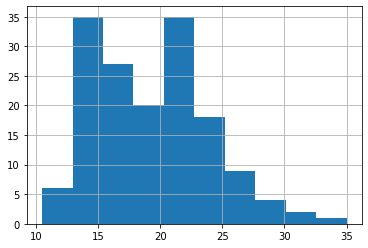

In [24]:
# Approximately normal distribution 
mpg_auto.hist()
mpg_auto.count()

77

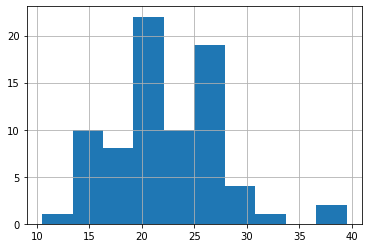

In [25]:
# Approximately normal distribution
mpg_manual.hist()
mpg_manual.count()

In [26]:
# Comparing variances
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [27]:
#Levene test to check for unequal variances
stats.levene(mpg_auto, mpg_manual)

# p value above .05, so I can't assert a difference in variance

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [28]:
# Conduct our t-test
t, p = stats.ttest_ind(mpg_manual, mpg_auto)
t, p, alpha

(4.593437735750014, 7.154374401145683e-06, 0.05)

In [29]:
#Because it's a 1 sample test

if p/2 < alpha: 
    print('We reject H0.')
else: 
    print('We fail to reject H0.')

We reject H0.


## Correlation Exercises

## 1. Use the telco_churn data. 
- Does tenure correlate with monthly charges?*

In [30]:
#Loading data set
df = pd.read_csv('Cust_Churn_Telco.csv')

# Removing missing values
df = df.dropna()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


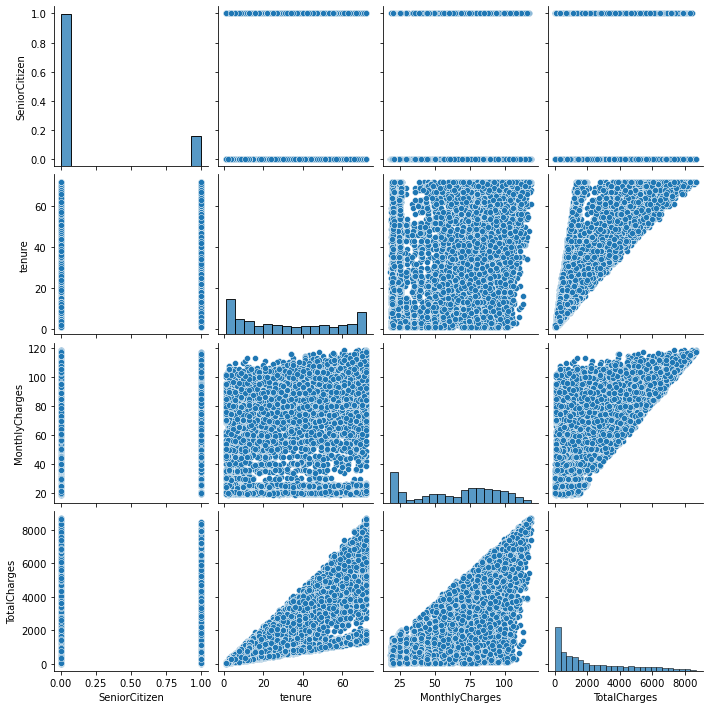

In [31]:
# Quick visualization 
sns.pairplot(df)

In [32]:
# Calculating Pearson's Correlation Coefficient -- Tenure vs. Monthly Charges
x = df.tenure
y= df.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.2468617666408957, 3.9898213232510553e-98)

In [33]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


- *Total charges?*

In [34]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Total Charges

x = df.tenure
y= df.TotalCharges


corr, p = stats.pearsonr(x, y)
corr, p

(0.8258804609332093, 0.0)

In [35]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


- *What happens if you control for phone and internet service?*

**Controlling for Phone Service**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

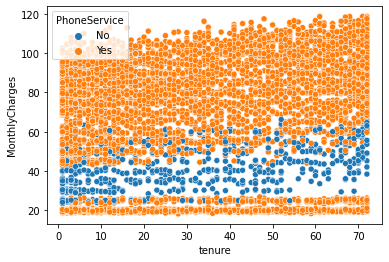

In [78]:
sns.scatterplot(data=df, x = 'tenure', y= 'MonthlyCharges', hue = 'PhoneService')

In [36]:
# Create subset with phone service
phone_service = df[df.PhoneService == 'Yes']
phone_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [54]:
# Create subset without phone service
no_phone_service = df[df.PhoneService == 'No']
no_phone_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


**With Phone Service**

In [37]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Monthly Charges (With Phone Service)

x = phone_service.tenure
y = phone_service.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.24419396575193372, 6.828016037598485e-87)

In [38]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


In [39]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Total Charges (With Phone Service)

x = phone_service.tenure
y = phone_service.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.8298393210699477, 0.0)

In [40]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


**Without Phone Service**

In [42]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Monthly Charges (Without Phone Service)

x = no_phone_service.tenure
y = no_phone_service.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.5924298640568981, 1.1732739032893169e-65)

In [43]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


In [44]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Total Charges (Without Phone Service)

x = no_phone_service.tenure
y = no_phone_service.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9534228506954507, 0.0)

In [45]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


**Controlling for Internet Service**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

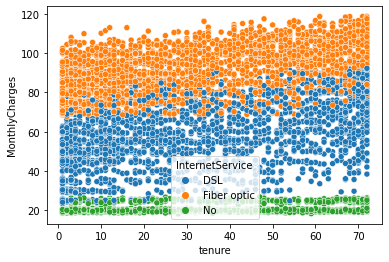

In [79]:
sns.scatterplot(data=df, x = 'tenure', y= 'MonthlyCharges', hue = 'InternetService')

In [48]:
# Create subset with internet service

internet_service = df[(df.InternetService == 'DSL') | (df.InternetService == 'Fiber optic')]
internet_service.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [53]:
# Create subset without internet service

no_internet_service = df[df.InternetService == 'No']
no_internet_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


**With Internet Service**

In [50]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Monthly Charges (With Internet Service)

x = internet_service.tenure
y = internet_service.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.37203919761332516, 1.6186841401674893e-180)

In [51]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


**Without Internet Service**

In [55]:
# Calculating Pearson's Correlation Coefficient - Tenure vs. Monthly Charges (With Internet Service)

x = no_internet_service.tenure
y = no_internet_service.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.34618773548574805, 4.896604599947503e-44)

In [56]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


## 2.Use the employees database.

- Is there a relationship between how long an employee has been with the company and their salary?

In [59]:
from env import host, password, username, get_db_url

In [62]:
# Create the dataframe with employee tenure and salaries
url = get_db_url('employees')
query = """
SELECT datediff(curdate(), hire_date) AS employee_tenure, salary 
FROM employees
JOIN salaries
USING(emp_no)
WHERE to_date > curdate();
"""

salary_and_tenure = pd.read_sql(query, url)
salary_and_tenure.head()

,employee_tenure,salary
0,13021,88958
1,13238,72527
2,12958,43311
3,12863,74057
4,11847,94692


In [63]:
# Calculating Pearson's Correlation Coefficient - Employee Tenure vs. Salary 

x = salary_and_tenure.employee_tenure
y = salary_and_tenure.salary

corr, p = stats.pearsonr(x, y)
corr, p

(0.30646256131860894, 0.0)

In [64]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


<AxesSubplot:xlabel='employee_tenure', ylabel='salary'>

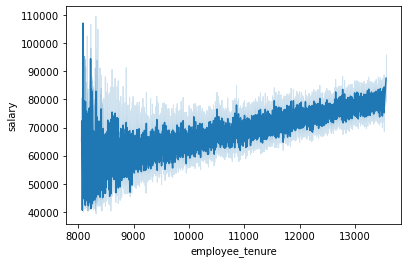

In [74]:
sns.lineplot(data = salary_and_tenure, x = 'employee_tenure', y = 'salary' )

- *Is there a relationship between how long an employee has been with the company and the number of titles they have had?*

In [84]:
# Create the dataframe with number of titles and employee tenure 

query = """
SELECT count(title) AS titles, datediff(curdate(), hire_date) AS employee_tenure
FROM employees
JOIN titles USING(emp_no)
GROUP BY emp_no;
"""

titles_and_tenure = pd.read_sql(query, url)
titles_and_tenure.head()

,titles,employee_tenure
0,1,13021
1,1,13238
2,1,12958
3,2,12863
4,2,11847


In [85]:
# Calculating Pearson's Correlation Coefficient - Employee Tenure vs. Number of Titles 

x = titles_and_tenure.employee_tenure
y = titles_and_tenure.titles

corr, p = stats.pearsonr(x, y)
corr, p

(0.2665989299136427, 0.0)

In [86]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


<AxesSubplot:xlabel='titles', ylabel='employee_tenure'>

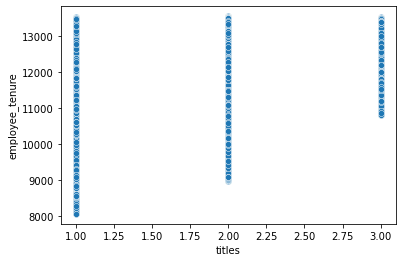

In [88]:
sns.scatterplot(data = titles_and_tenure, x = 'titles', y = 'employee_tenure' )

## 3. Use the sleepstudy data.

- Is there a relationship between days and reaction time?

In [89]:
from pydataset import data
sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [90]:
# Calculating Pearson's Correlation Coefficient - Days vs. Reaction Time 

x = sleepstudy.Days
y = sleepstudy.Reaction

corr, p = stats.pearsonr(x, y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [91]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

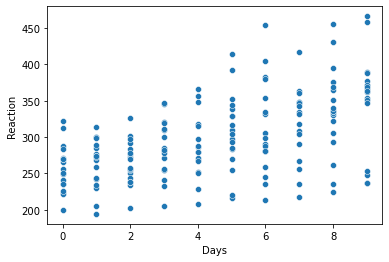

In [93]:
sns.scatterplot(data = sleepstudy, x='Days', y='Reaction')